### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



INGRESOS TOTALES POR TIENDA
Tienda 1: $1,150,880,400.00
Tienda 2: $1,116,343,500.00
Tienda 3: $1,098,019,600.00
Tienda 4: $1,038,375,700.00

ESTADÍSTICAS DE INGRESOS
Promedio de ingresos: $1,100,904,800.00
Tienda con mayores ingresos: Tienda 1
Tienda con menores ingresos: Tienda 4


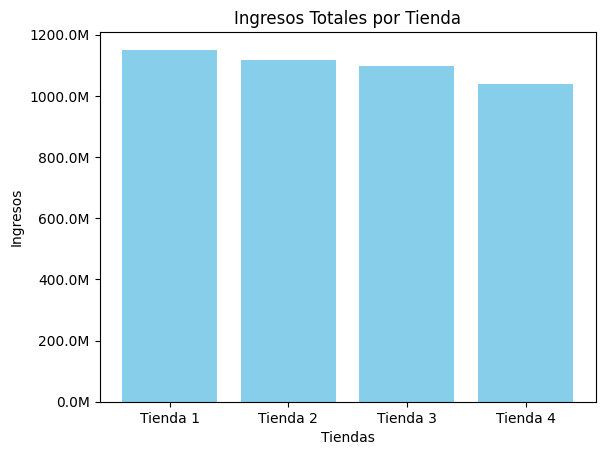

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd
import numpy as np

def calcular_precio_total(tienda_df):
    """Calcula el precio total de una tienda"""
    return tienda_df['Precio'].sum()

def crear_resumen_ingresos(tiendas):
    """Crea el resumen de ingresos por tienda"""

    totales = {}

    # Recorrer cada tienda y calcular el ingreso total
    for nombre, tienda_df in tiendas.items():
        totales[nombre] = calcular_precio_total(tienda_df)

    # Crear un DataFrame con los resultados
    resumen = pd.DataFrame({
        'Tienda': list(totales.keys()),
        'Ingreso_Total': list(totales.values())
    })

    # Ordenar el resumen de mayor a menor ingreso
    resumen = resumen.sort_values('Ingreso_Total', ascending=False)

    return resumen, totales

def millones(x, pos):
    return f'{x / 1_000_000:.1f}M'

def visualizar_ingresos(totales):
    """Muestra un gráfico de barras con los ingresos por tienda"""

    tiendas = list(totales.keys())
    ingresos = list(totales.values())

    plt.bar(tiendas, ingresos, color='skyblue')

    plt.title('Ingresos Totales por Tienda')
    plt.xlabel('Tiendas')
    plt.ylabel('Ingresos')

    # Aplicar la función para mostrar millones en el eje Y
    plt.gca().yaxis.set_major_formatter(FuncFormatter(millones))

    plt.show()



def imprimir_estadisticas(resumen, totales):
    """Imprime las estadísticas de ingresos"""
    ingresos = list(totales.values())

    print("INGRESOS TOTALES POR TIENDA")
    for _, row in resumen.iterrows():
        print(f"{row['Tienda']}: ${row['Ingreso_Total']:,.2f}")

    print(f"\nESTADÍSTICAS DE INGRESOS")
    print(f"Promedio de ingresos: ${np.mean(ingresos):,.2f}")
    print(f"Tienda con mayores ingresos: {resumen.iloc[0]['Tienda']}")
    print(f"Tienda con menores ingresos: {resumen.iloc[-1]['Tienda']}")

# Ejecutar análisis
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

resumen_ingresos, totales_ingresos = crear_resumen_ingresos(tiendas)
imprimir_estadisticas(resumen_ingresos, totales_ingresos)
visualizar_ingresos(totales_ingresos)

# 2. Ventas por categoría


 VENTAS POR CATEGORÍA - Tienda 1 

Ventas por categoría:
  Muebles: 465 ventas
  Electrónicos: 448 ventas
  Juguetes: 324 ventas
  Electrodomésticos: 312 ventas
  Deportes y diversión: 284 ventas
  Instrumentos musicales: 182 ventas
  Libros: 173 ventas
  Artículos para el hogar: 171 ventas

Categoría más vendida: Muebles (465 ventas)
Categoría menos vendida: Artículos para el hogar (171 ventas)
Total de categorías: 8

 VENTAS POR CATEGORÍA - Tienda 2 

Ventas por categoría:
  Muebles: 442 ventas
  Electrónicos: 422 ventas
  Juguetes: 313 ventas
  Electrodomésticos: 305 ventas
  Deportes y diversión: 275 ventas
  Instrumentos musicales: 224 ventas
  Libros: 197 ventas
  Artículos para el hogar: 181 ventas

Categoría más vendida: Muebles (442 ventas)
Categoría menos vendida: Artículos para el hogar (181 ventas)
Total de categorías: 8

 VENTAS POR CATEGORÍA - Tienda 3 

Ventas por categoría:
  Muebles: 499 ventas
  Electrónicos: 451 ventas
  Juguetes: 315 ventas
  Electrodomésticos: 278

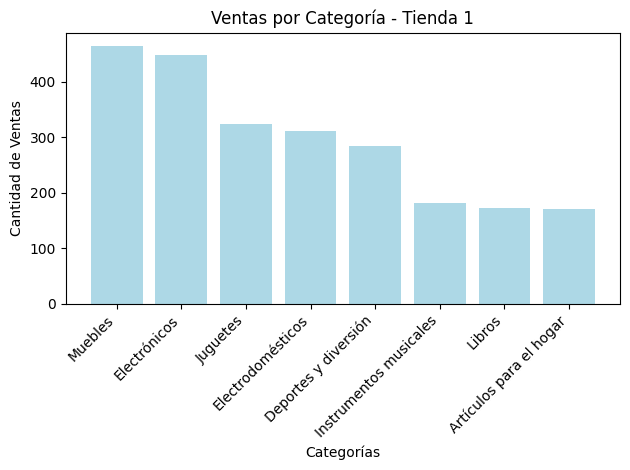

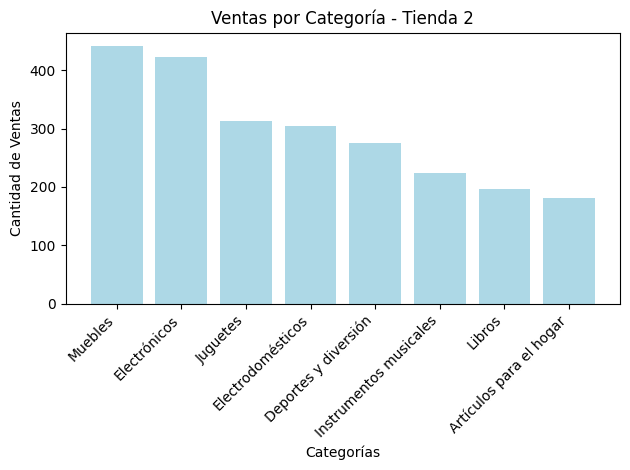

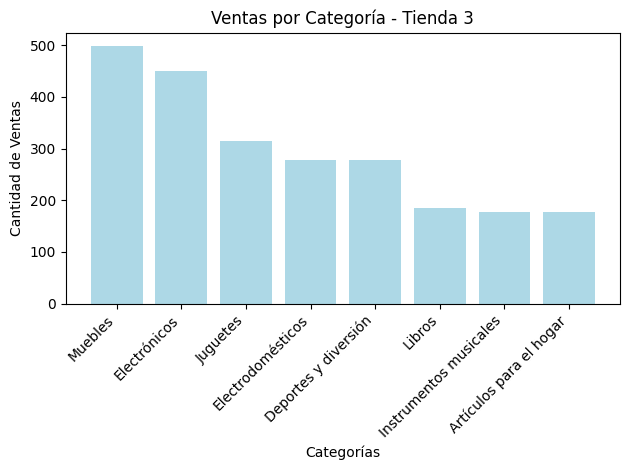

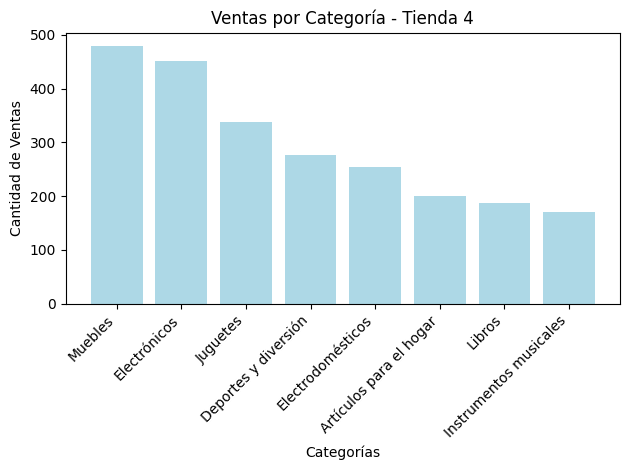

In [17]:


def calcular_ventas_por_categoria(tienda_df):
    """Calcula la cantidad de productos vendidos por categoría en una tienda"""
    return tienda_df['Categoría del Producto'].value_counts()

def crear_resumen_categorias(tiendas):
    """Crea un resumen de ventas por categoría para todas las tiendas"""
    resumen_por_tienda = {}

    for nombre, tienda_df in tiendas.items():
        ventas_categoria = calcular_ventas_por_categoria(tienda_df)
        resumen_por_tienda[nombre] = ventas_categoria

    return resumen_por_tienda

def visualizar_ventas_por_categoria(resumen_categorias):
    """Visualiza las ventas por categoría de cada tienda"""
    for tienda, categorias in resumen_categorias.items():
        plt.bar(categorias.index, categorias.values, color='lightblue')
        plt.title(f'Ventas por Categoría - {tienda}')
        plt.xlabel('Categorías')
        plt.ylabel('Cantidad de Ventas')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()

def imprimir_estadisticas_categorias(ventas_categoria, nombre_tienda):
    """Imprime un resumen básico de las ventas por categoría"""
    print(f"\n VENTAS POR CATEGORÍA - {nombre_tienda} ")

    # Mostrar todas las categorías
    print("\nVentas por categoría:")
    for categoria in ventas_categoria.index:
        cantidad = ventas_categoria[categoria]
        print(f"  {categoria}: {cantidad} ventas")

    # Más y menos vendida
    categoria_mas_vendida = ventas_categoria.idxmax()
    ventas_mas = ventas_categoria.max()
    print(f"\nCategoría más vendida: {categoria_mas_vendida} ({ventas_mas} ventas)")

    categoria_menos_vendida = ventas_categoria.idxmin()
    ventas_menos = ventas_categoria.min()
    print(f"Categoría menos vendida: {categoria_menos_vendida} ({ventas_menos} ventas)")

    print(f"Total de categorías: {len(ventas_categoria)}")

tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

resumen_categorias = crear_resumen_categorias(tiendas)

for nombre, ventas_categoria in resumen_categorias.items():
    imprimir_estadisticas_categorias(ventas_categoria, nombre)

print('\nRESUMEN GRAFICO')
visualizar_ventas_por_categoria(resumen_categorias)


# 3. Calificación promedio de la tienda


=== CALIFICACIONES PROMEDIO POR TIENDA ===
1. Tienda 3: 4.05 estrellas
2. Tienda 2: 4.04 estrellas
3. Tienda 4: 4.00 estrellas
4. Tienda 1: 3.98 estrellas

 ANÁLISIS GENERAL 
Promedio general: 4.01 estrellas
Mejor calificada: Tienda 3 (4.05)
Peor calificada: Tienda 1 (3.98)
Diferencia entre mejor y peor: 0.07 estrellas

 DISTRIBUCIÓN DE CALIFICACIONES 

Tienda 1:
  Calificaciones bajas (1-2): 405 (17.2%)
  Calificaciones altas (4-5): 1736 (73.6%)

Tienda 2:
  Calificaciones bajas (1-2): 366 (15.5%)
  Calificaciones altas (4-5): 1784 (75.6%)

Tienda 3:
  Calificaciones bajas (1-2): 376 (15.9%)
  Calificaciones altas (4-5): 1790 (75.9%)

Tienda 4:
  Calificaciones bajas (1-2): 395 (16.8%)
  Calificaciones altas (4-5): 1753 (74.3%)


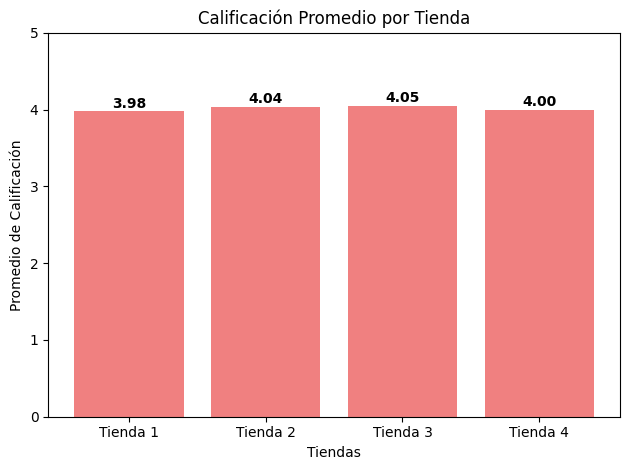

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

def calcular_calificacion_promedio(tienda_df):
    """Calcula la calificación promedio de una tienda"""
    return tienda_df['Calificación'].mean()

def obtener_distribucion_calificaciones(tienda_df):
    """Cuenta cuántas veces aparece cada calificación"""
    return tienda_df['Calificación'].value_counts().sort_index()

def crear_resumen_calificaciones(tiendas):
    """Calcula promedio y distribución de calificaciones por tienda"""
    resumen = {}
    distribucion = {}

    for nombre, tienda_df in tiendas.items():
        promedio = calcular_calificacion_promedio(tienda_df)
        resumen[nombre] = promedio
        distribucion[nombre] = obtener_distribucion_calificaciones(tienda_df)

    return resumen, distribucion

def visualizar_calificaciones(resumen_calificaciones):
    """Muestra un gráfico de barras con las calificaciones promedio"""
    tiendas = list(resumen_calificaciones.keys())
    promedios = list(resumen_calificaciones.values())

    plt.bar(tiendas, promedios, color='lightcoral')
    plt.title('Calificación Promedio por Tienda')
    plt.xlabel('Tiendas')
    plt.ylabel('Promedio de Calificación')
    plt.ylim(0, 5)

    # Mostrar los valores arriba de cada barra
    for i in range(len(tiendas)):
        plt.text(i, promedios[i] + 0.05, f"{promedios[i]:.2f}", ha='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

def imprimir_estadisticas_calificaciones(resumen_calificaciones, distribucion_calificaciones):
    """Imprime un resumen claro y paso a paso de las calificaciones"""
    print("=== CALIFICACIONES PROMEDIO POR TIENDA ===")

    # Ordenar de mayor a menor promedio
    def obtener_promedio(t):
        return resumen_calificaciones[t]

    tiendas_ordenadas = sorted(resumen_calificaciones, key=obtener_promedio, reverse=True)

    for i, tienda in enumerate(tiendas_ordenadas, 1):
        promedio = resumen_calificaciones[tienda]
        print(f"{i}. {tienda}: {promedio:.2f} estrellas")

    # Análisis general
    print("\n ANÁLISIS GENERAL ")
    valores = list(resumen_calificaciones.values())
    promedio_general = sum(valores) / len(valores)

    mejor_tienda = max(resumen_calificaciones, key=resumen_calificaciones.get)
    peor_tienda = min(resumen_calificaciones, key=resumen_calificaciones.get)
    diferencia = resumen_calificaciones[mejor_tienda] - resumen_calificaciones[peor_tienda]

    print(f"Promedio general: {promedio_general:.2f} estrellas")
    print(f"Mejor calificada: {mejor_tienda} ({resumen_calificaciones[mejor_tienda]:.2f})")
    print(f"Peor calificada: {peor_tienda} ({resumen_calificaciones[peor_tienda]:.2f})")
    print(f"Diferencia entre mejor y peor: {diferencia:.2f} estrellas")

    # Distribución
    print("\n DISTRIBUCIÓN DE CALIFICACIONES ")
    for tienda, dist in distribucion_calificaciones.items():
        total = dist.sum()
        bajas = dist.get(1, 0) + dist.get(2, 0)
        altas = dist.get(4, 0) + dist.get(5, 0)

        porcentaje_bajas = (bajas / total) * 100 if total else 0
        porcentaje_altas = (altas / total) * 100 if total else 0

        print(f"\n{tienda}:")
        print(f"  Calificaciones bajas (1-2): {bajas} ({porcentaje_bajas:.1f}%)")
        print(f"  Calificaciones altas (4-5): {altas} ({porcentaje_altas:.1f}%)")

# Ejecutar análisis
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

resumen_calificaciones, distribucion_calificaciones = crear_resumen_calificaciones(tiendas)
imprimir_estadisticas_calificaciones(resumen_calificaciones, distribucion_calificaciones)
visualizar_calificaciones(resumen_calificaciones)


# 4. Productos más y menos vendidos

 ANÁLISIS DE PRODUCTOS POR TIENDA 

Tienda 1:
  Total de productos: 51
  Producto más vendido: Microondas (60 ventas)
  Producto menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2:
  Total de productos: 51
  Producto más vendido: Iniciando en programación (65 ventas)
  Producto menos vendido: Juego de mesa (32 ventas)

Tienda 3:
  Total de productos: 51
  Producto más vendido: Kit de bancas (57 ventas)
  Producto menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
  Total de productos: 51
  Producto más vendido: Cama box (62 ventas)
  Producto menos vendido: Guitarra eléctrica (33 ventas)


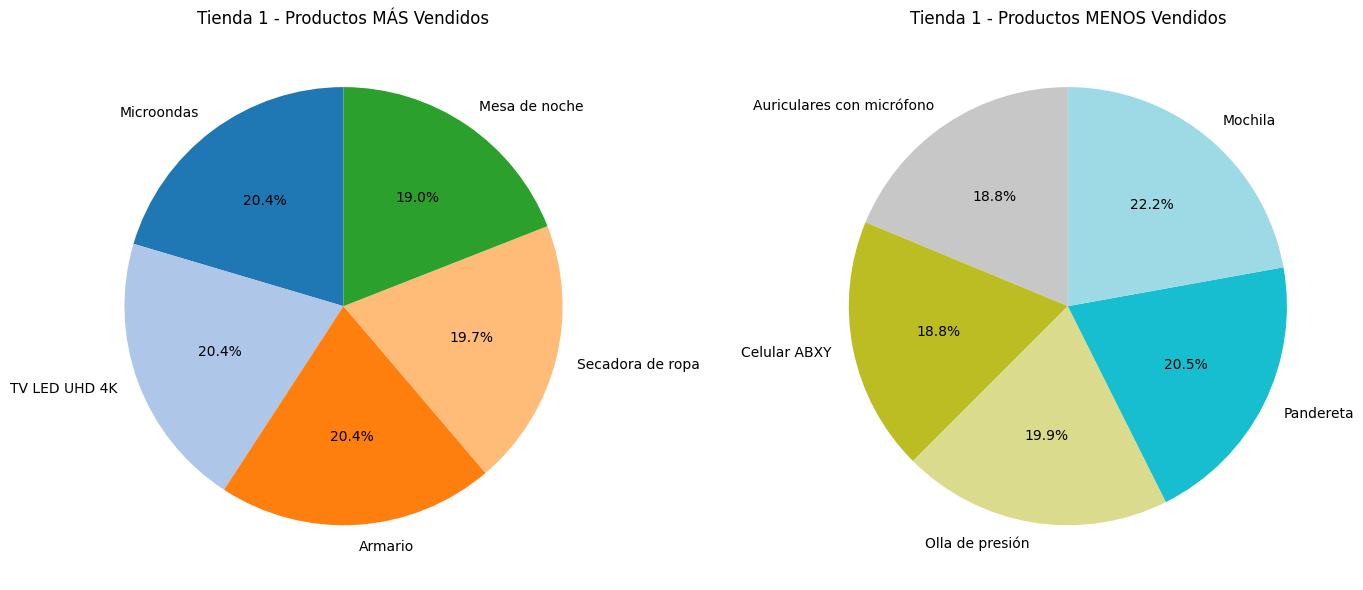

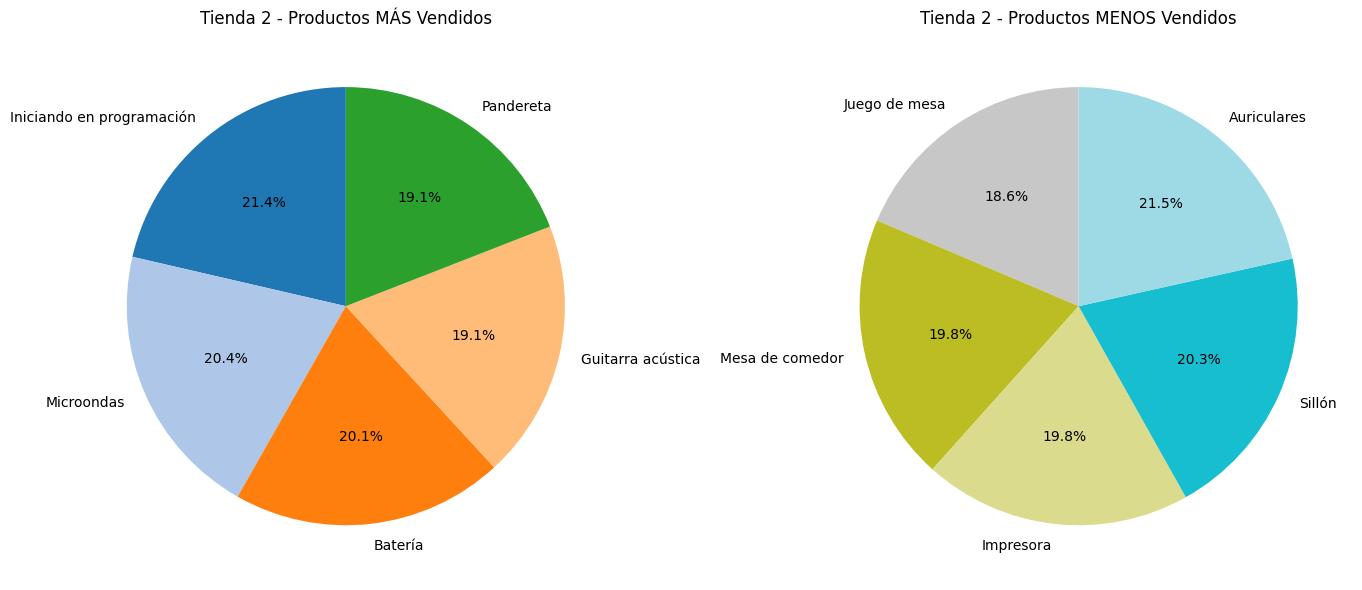

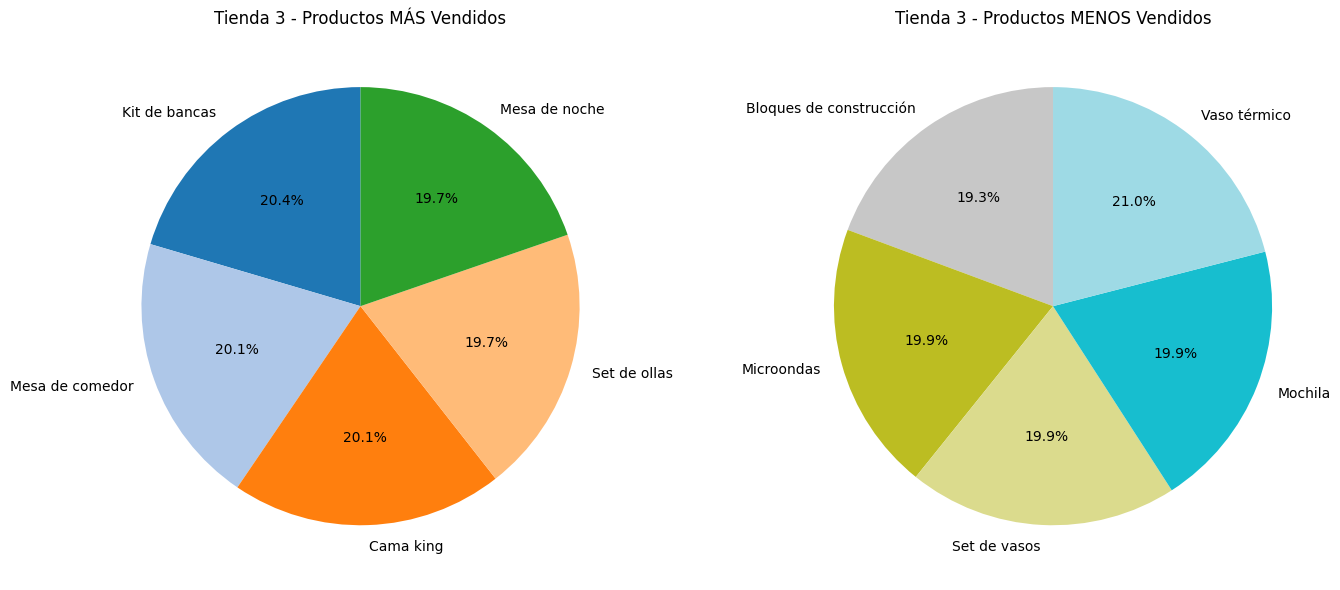

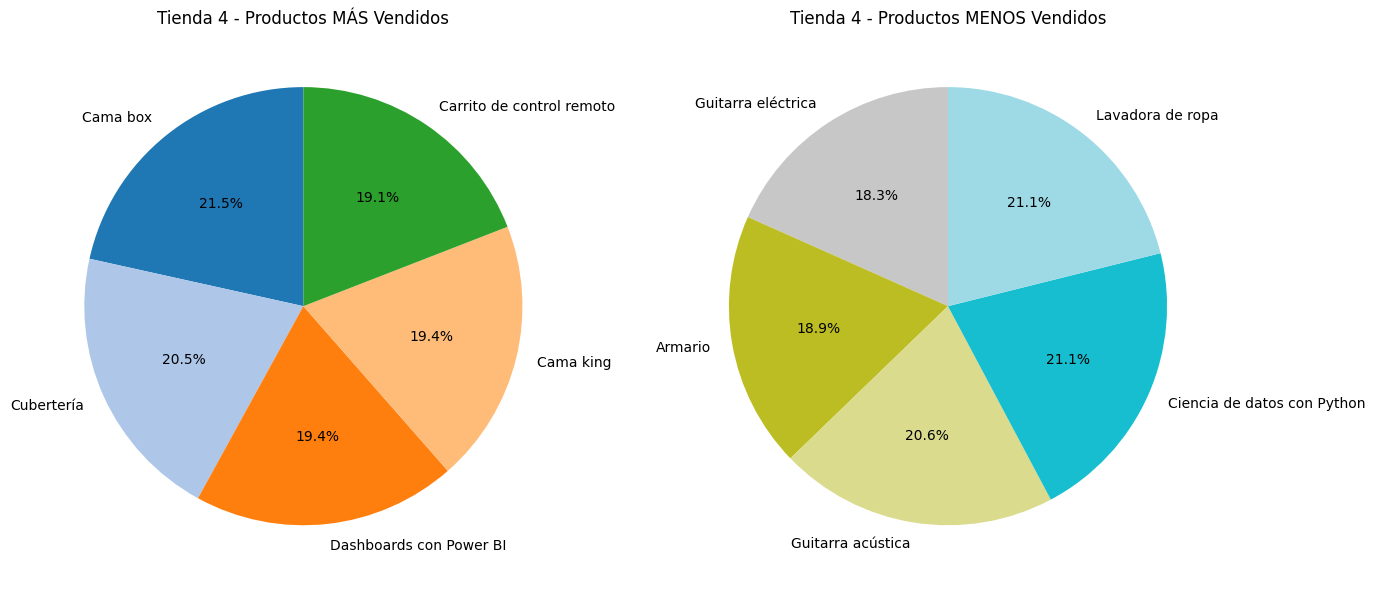

In [29]:
def calcular_productos_vendidos(tienda_df):
    """Cuenta cuántas veces se vendió cada producto"""
    return tienda_df['Producto'].value_counts()

def obtener_top_bottom_productos(productos_vendidos, n=5):
    """Obtiene los top N y bottom N productos más vendidos"""
    top_productos = productos_vendidos.head(n)
    bottom_productos = productos_vendidos.sort_values().head(n)
    return top_productos, bottom_productos

def crear_resumen_productos(tiendas, n=5):
    """Genera resumen de productos top y bottom por tienda"""
    resumen_productos = {}

    for nombre, tienda_df in tiendas.items():
        productos_vendidos = calcular_productos_vendidos(tienda_df)
        top, bottom = obtener_top_bottom_productos(productos_vendidos, n)
        resumen_productos[nombre] = {
            'top': top,
            'bottom': bottom,
            'total_productos': len(productos_vendidos)
        }

    return resumen_productos


def visualizar_productos_por_tienda(resumen_productos):
    """Grafica productos más y menos vendidos por tienda usando gráficos de pastel con colores variados"""
    for tienda, datos in resumen_productos.items():
        top_productos = datos['top']
        bottom_productos = datos['bottom']

        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

        # Colores variados para top y bottom (tab20 tiene 20 colores distintos)
        colores_top = plt.cm.tab20.colors[:len(top_productos)]
        colores_bottom = plt.cm.tab20.colors[-len(bottom_productos):]

        # Pastel top productos
        ax1.pie(top_productos.values, labels=top_productos.index, autopct='%1.1f%%',
                startangle=90, colors=colores_top)
        ax1.set_title(f'{tienda} - Productos MÁS Vendidos')

        # Pastel bottom productos
        ax2.pie(bottom_productos.values, labels=bottom_productos.index, autopct='%1.1f%%',
                startangle=90, colors=colores_bottom)
        ax2.set_title(f'{tienda} - Productos MENOS Vendidos')

        plt.tight_layout()
        plt.show()



def imprimir_estadisticas_productos(resumen_productos):
    """Imprime estadísticas básicas para cada tienda"""
    print(" ANÁLISIS DE PRODUCTOS POR TIENDA ")

    for tienda, datos in resumen_productos.items():
        top_productos = datos['top']
        bottom_productos = datos['bottom']
        total_productos = datos['total_productos']

        top_lista = list(top_productos.items())
        bottom_lista = list(bottom_productos.items())

        print(f"\n{tienda}:")
        print(f"  Total de productos: {total_productos}")

        if len(top_lista) > 0:
            producto_mas_vendido, cantidad_mas_vendida = top_lista[0]
            print(f"  Producto más vendido: {producto_mas_vendido} ({cantidad_mas_vendida} ventas)")
        else:
            print("  No hay productos vendidos.")

        if len(bottom_lista) > 0:
            producto_menos_vendido, cantidad_menos_vendida = bottom_lista[0]
            print(f"  Producto menos vendido: {producto_menos_vendido} ({cantidad_menos_vendida} ventas)")
        else:
            print("  No hay productos vendidos.")



# Ejemplo de ejecución (usar tus DataFrames reales)
tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

resumen_productos = crear_resumen_productos(tiendas, n=5)
imprimir_estadisticas_productos(resumen_productos)
visualizar_productos_por_tienda(resumen_productos)


# 5. Envío promedio por tienda

 COSTOS DE ENVÍO PROMEDIO POR TIENDA 
1. Tienda 4: $23,459.46
2. Tienda 3: $24,805.68
3. Tienda 2: $25,216.24
4. Tienda 1: $26,018.61

 DETALLES POR TIENDA 

Tienda 1:
  - Costo promedio: $26,018.61
  - Rango de costos: desde $0 hasta $160,800
  - Envíos gratis: 209 (8.9%)

Tienda 2:
  - Costo promedio: $25,216.24
  - Rango de costos: desde $0 hasta $162,500
  - Envíos gratis: 214 (9.1%)

Tienda 3:
  - Costo promedio: $24,805.68
  - Rango de costos: desde $0 hasta $158,400
  - Envíos gratis: 208 (8.8%)

Tienda 4:
  - Costo promedio: $23,459.46
  - Rango de costos: desde $0 hasta $154,700
  - Envíos gratis: 196 (8.3%)


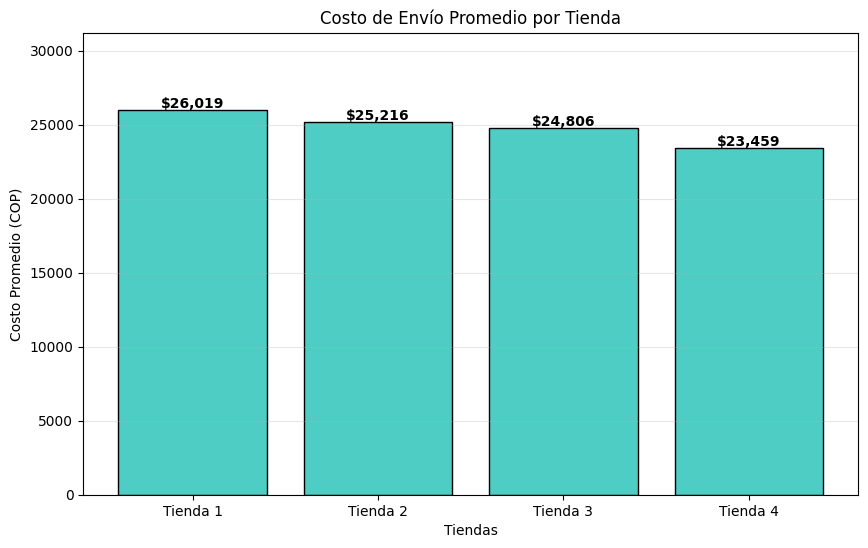

In [31]:
from operator import itemgetter
import matplotlib.pyplot as plt

def calcular_envio_promedio(tienda_df):
    """Calcula el costo promedio de envío en una tienda"""
    return tienda_df['Costo de envío'].mean()

def calcular_estadisticas_envio(tienda_df):
    """Calcula estadísticas básicas sobre el costo de envío"""
    envios = tienda_df['Costo de envío']
    return {
        'promedio': envios.mean(),
        'minimo': envios.min(),
        'maximo': envios.max(),
        'envios_gratis': (envios == 0).sum(),
        'total_envios': len(envios)
    }

def crear_resumen_envios(tiendas):
    """Genera un resumen de envíos para todas las tiendas"""
    resumen_promedio = {}
    resumen_completo = {}

    for nombre, tienda_df in tiendas.items():
        resumen_promedio[nombre] = calcular_envio_promedio(tienda_df)
        resumen_completo[nombre] = calcular_estadisticas_envio(tienda_df)

    return resumen_promedio, resumen_completo

def imprimir_estadisticas_envio(resumen_promedio, resumen_completo):
    """Imprime un resumen de los costos de envío"""
    print(" COSTOS DE ENVÍO PROMEDIO POR TIENDA ")

    lista_tiendas = list(resumen_promedio.items())
    lista_tiendas_ordenada = sorted(lista_tiendas, key=itemgetter(1))  # Ordena por costo promedio

    for i, (tienda, promedio) in enumerate(lista_tiendas_ordenada, 1):
        print(f"{i}. {tienda}: ${promedio:,.2f}")

    print("\n DETALLES POR TIENDA ")

    for tienda, stats in resumen_completo.items():

        porcentaje_gratis = (stats['envios_gratis'] / stats['total_envios']) * 100

        print(f"\n{tienda}:")
        print(f"  - Costo promedio: ${stats['promedio']:,.2f}")
        print(f"  - Rango de costos: desde ${stats['minimo']:,.0f} hasta ${stats['maximo']:,.0f}")
        print(f"  - Envíos gratis: {stats['envios_gratis']} ({porcentaje_gratis:.1f}%)")

def visualizar_costos_envio_simple(resumen_promedio):
    """Grafica una barra sencilla con el costo promedio de envío por tienda"""

    tiendas = list(resumen_promedio.keys())
    promedios = list(resumen_promedio.values())

    plt.figure(figsize=(10,6))
    barras = plt.bar(tiendas, promedios, color='#4ECDC4', edgecolor='black')
    plt.title('Costo de Envío Promedio por Tienda')
    plt.xlabel('Tiendas')
    plt.ylabel('Costo Promedio (COP)')

    # Mostrar el valor de cada barra encima
    for barra, valor in zip(barras, promedios):
        plt.text(barra.get_x() + barra.get_width()/2, valor + 100, f"${valor:,.0f}",
                 ha='center', fontweight='bold')

    plt.ylim(0, max(promedios)*1.2)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

tiendas = {
    'Tienda 1': tienda,
    'Tienda 2': tienda2,
    'Tienda 3': tienda3,
    'Tienda 4': tienda4
}

resumen_promedio, resumen_completo = crear_resumen_envios(tiendas)
imprimir_estadisticas_envio(resumen_promedio, resumen_completo)
visualizar_costos_envio_simple(resumen_promedio)
